# Сбор и подготовка данных

## Датасет №1. Продажи домов

[**Ссылка**](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

**Проблемная область**: Данный набор данных о продажах домов касается недвижимости.

**Объекты наблюдения**: Объектом наблюдения в данном случае является каждый отдельный дом (единица недвижимости), который был продан. Каждая строка в таблице представляет собой один дом.

**Атрибуты объектов:**
- `id` — уникальный идентификатор дома.
- `date` — дата продажи.
- `price` — цена продажи дома (целевая переменная).
- `bedrooms` — количество спален.
- `bathrooms` — количество ванных комнат.
- `sqft_living` — общая жилая площадь (в квадратных футах).
- `sqft_lot` — площадь участка.
- `floors` — количество этажей.
- `waterfront` — есть ли выход на воду.
- `view` — наличие вида из окон.
- `condition` — состояние дома (оценка).
- `grade` — оценка качества дома.
- `sqft_above` — площадь дома над землей.
- `sqft_basement` — площадь подвала.
- `yr_built` — год постройки.
- `yr_renovated` — год последнего ремонта.
- `zipcode` — почтовый индекс.
- `lat` и `long` — географические координаты дома.
- `sqft_living15` и `sqft_lot15` — средняя площадь жилой площади и участка для 15 ближайших домов.

**Бизнес-цель**: Улучшенное прогнозирование цен поможет продавцам устанавливать конкурентные цены, а покупателям — принимать более взвешенные решения о покупке. Это также даст риелторам возможность лучше ориентироваться на рынке и оптимизировать стратегию продажи.

**Техническая цель**: Прогнозирование цен на жилье

**Входные данные**: Исторические данные о продажах домов, включая все признаки (количество комнат, площадь, состояние, местоположение и др.).

**Целевая переменная**: Цена (`price`).

In [1]:
import pandas as pd
df = pd.read_csv(".//static//csv//kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Отбросим лишний признак `id`, который не будет принимать участие в анализе данного набора данных

In [2]:
df.drop(columns=['id'], inplace=True)

### Получение сведений о пропущенных данных

In [3]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool



Пропущенных данных в датасете **не обнаружено**

### Проверка набора данных на выбросы

Количество выбросов в столбце 'price': 1146
Количество выбросов в столбце 'sqft_living': 572
Количество выбросов в столбце 'bathrooms': 571
Количество выбросов в столбце 'yr_built': 0


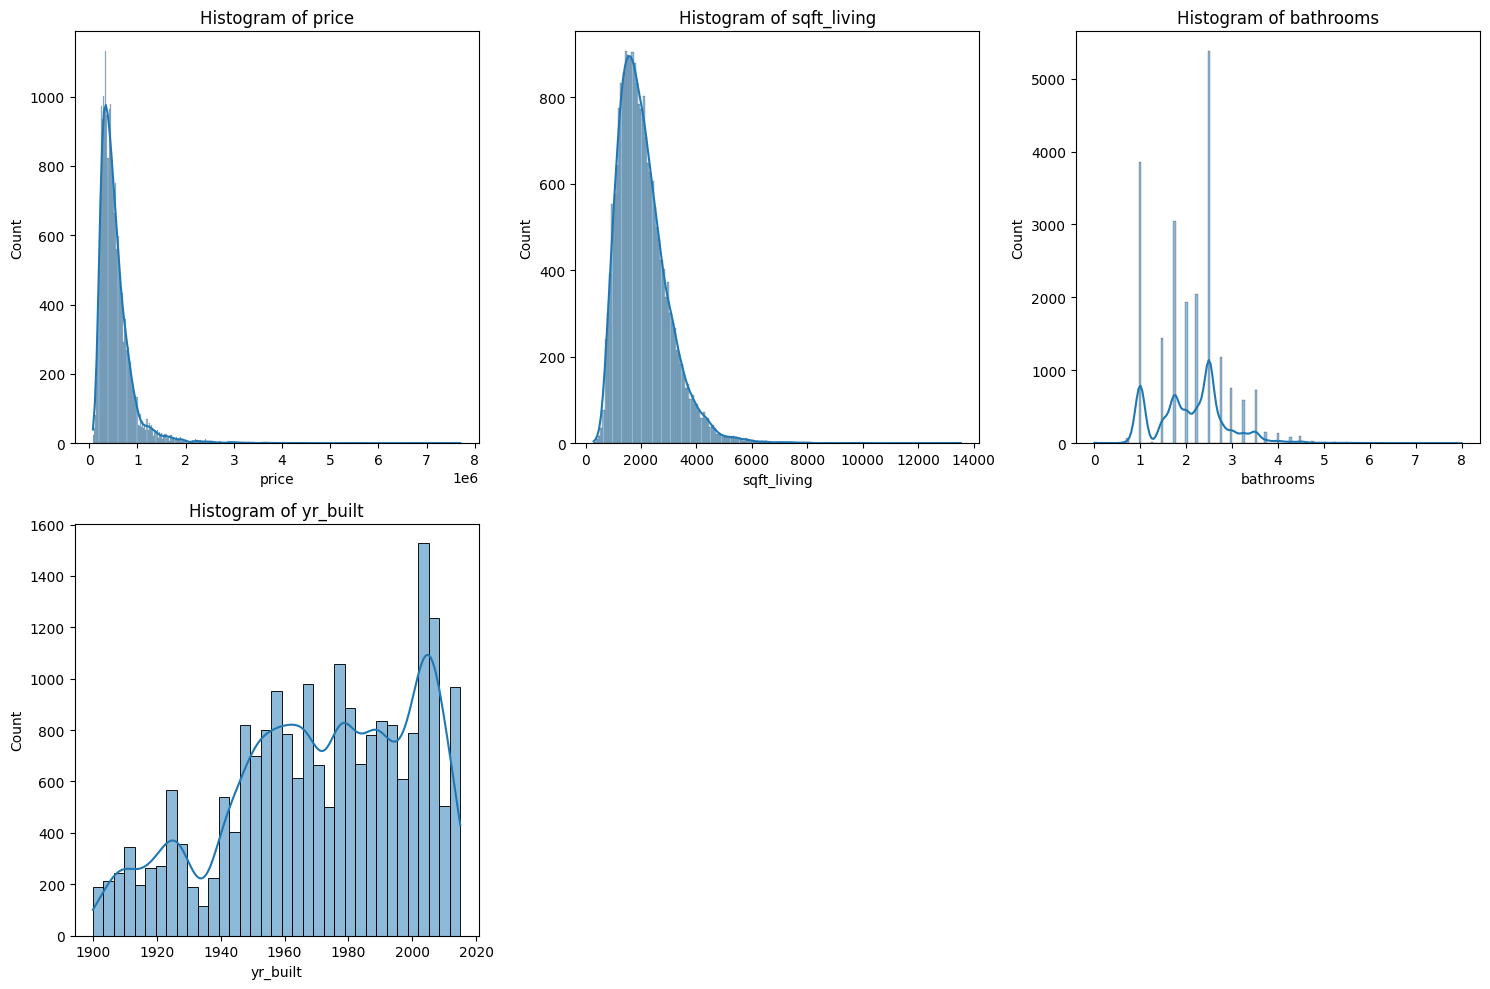

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['price', 'sqft_living', 'bathrooms', 'yr_built']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Признак `yr_built` не имеет выбросов, а для признаков `price`, `sqft_living` и `bathrooms` необходимо использовать метод решения проблемы выбросов. Так как в рассматриваемом наборе данных количество наблюдений достаточно велико (более 21 тыс.), то для решения проблемы выбросов данных воспользуемся методом удаления наблюдений с такими выбросами:

In [5]:
# Выбираем столбцы для очистки
columns_to_clean =  ['price', 'sqft_living', 'bathrooms']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

Количество удаленных строк: 1520


Оценим выбросы в выборке после удаления некоторых наблюдений:

Количество выбросов в столбце 'price': 211
Количество выбросов в столбце 'sqft_living': 34
Количество выбросов в столбце 'bathrooms': 0


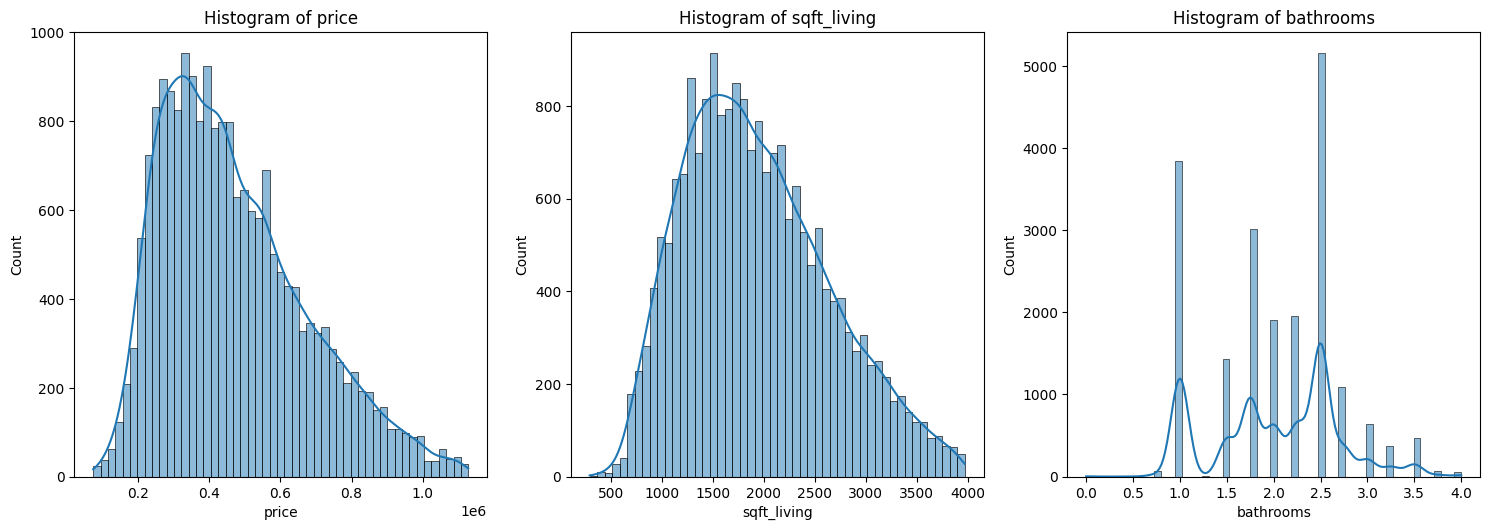

In [6]:
columns_to_check =  ['price', 'sqft_living', 'bathrooms']

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Судя по данным на диаграмме выше, количество выбросов значительно сократилось и не превышает допустимые диапозоны.

### Разбиение датасета на выборки

Средняя цена в обучающей выборке: 470646.91546391754
Средняя цена в контрольной выборке: 468579.52654280025
Средняя цена в тестовой выборке: 471598.4402786994

Стандартное отклонение цены в обучающей выборке: 202445.70321089853
Стандартное отклонение цены в контрольной выборке: 202183.1175619316
Стандартное отклонение цены в тестовой выборке: 206393.61053704965

Распределение по квартилам (обучающая):
0.25    313500.0
0.50    435000.0
0.75    594000.0
Name: price, dtype: float64

Распределение по квартилам (контрольная):
0.25    313612.5
0.50    429925.0
0.75    595000.0
Name: price, dtype: float64

Распределение по квартилам (тестовая):
0.25    312500.0
0.50    428500.0
0.75    595375.0
Name: price, dtype: float64


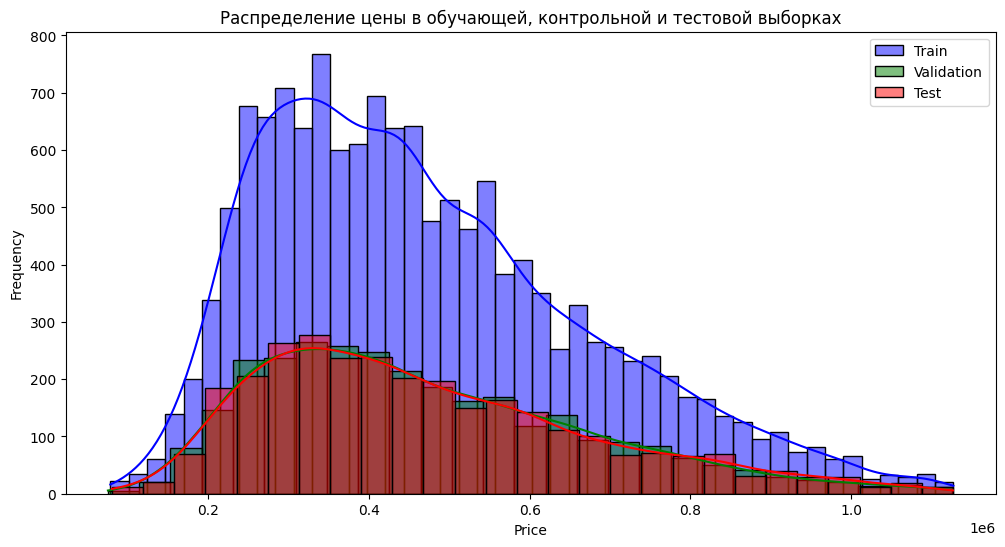

In [7]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Средние значения цены
print("Средняя цена в обучающей выборке:", train_data['price'].mean())
print("Средняя цена в контрольной выборке:", val_data['price'].mean())
print("Средняя цена в тестовой выборке:", test_data['price'].mean())
print()

# Стандартное отклонение цены
print("Стандартное отклонение цены в обучающей выборке:", train_data['price'].std())
print("Стандартное отклонение цены в контрольной выборке:", val_data['price'].std())
print("Стандартное отклонение цены в тестовой выборке:", test_data['price'].std())
print()

# Проверка распределений по количеству объектов в диапазонах
print("Распределение по квартилам (обучающая):")
print(train_data['price'].quantile([0.25, 0.5, 0.75]))
print()
print("Распределение по квартилам (контрольная):")
print(val_data['price'].quantile([0.25, 0.5, 0.75]))
print()
print("Распределение по квартилам (тестовая):")
print(test_data['price'].quantile([0.25, 0.5, 0.75]))

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_data['price'], color='blue', label='Train', kde=True)
sns.histplot(val_data['price'], color='green', label='Validation', kde=True)
sns.histplot(test_data['price'], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках')
plt.show()

Выборки оказались **недостаточно сбалансированными**. Используем методы приращения данных *с избытком* и *с недостатком*:

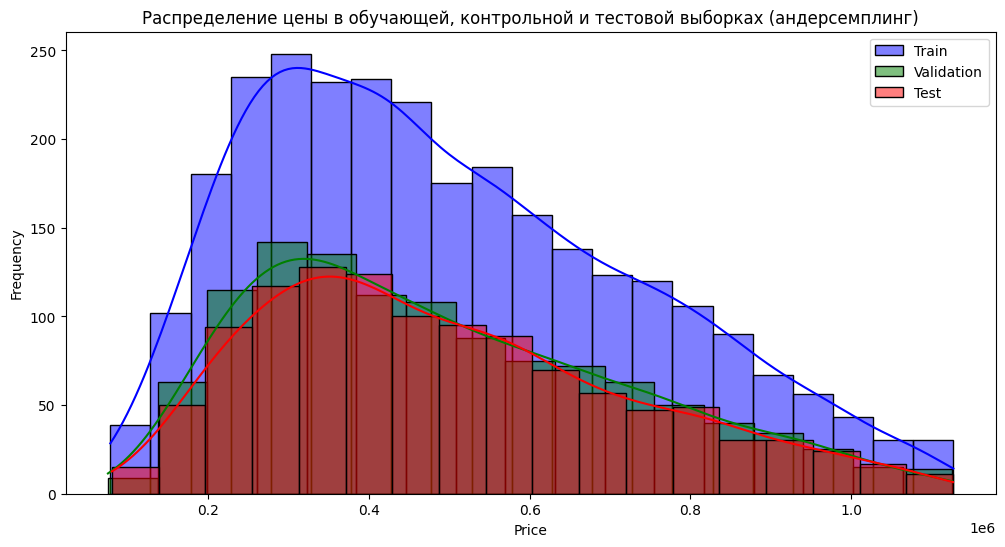

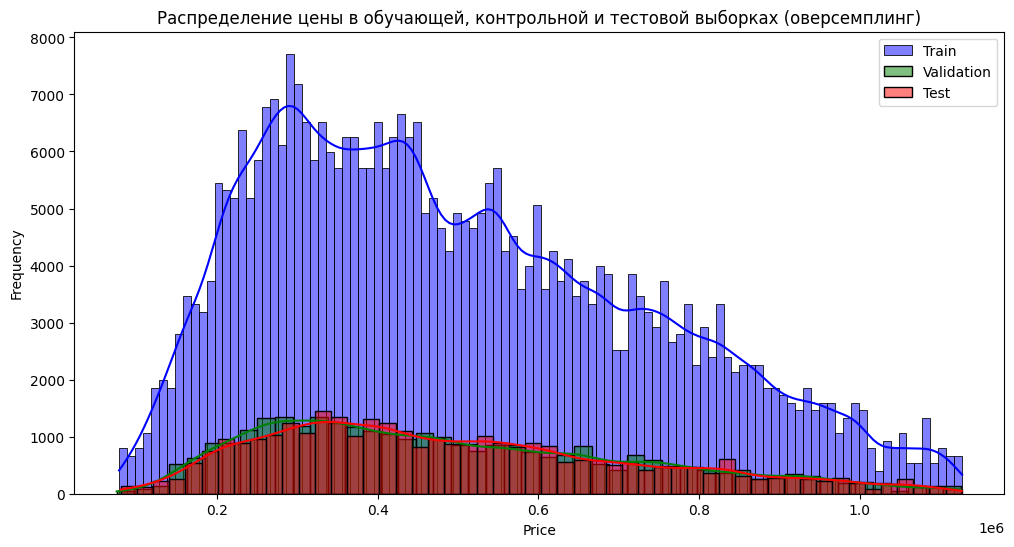

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_data, 'price')
val_df_oversampled = oversample(val_data, 'price')
test_df_oversampled = oversample(test_data, 'price')

train_df_undersampled = undersample(train_data, 'price')
val_df_undersampled = undersample(val_data, 'price')
test_df_undersampled = undersample(test_data, 'price')

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_df_undersampled['price'], color='blue', label='Train', kde=True)
sns.histplot(val_df_undersampled['price'], color='green', label='Validation', kde=True)
sns.histplot(test_df_undersampled['price'], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках (андерсемплинг)')
plt.show()

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_df_oversampled['price'], color='blue', label='Train', kde=True)
sns.histplot(val_df_oversampled['price'], color='green', label='Validation', kde=True)
sns.histplot(test_df_oversampled['price'], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках (оверсемплинг)')
plt.show()

## Датасет №2. Ближайшие к Земле объекты

[**Ссылка**](https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects)

**Проблемная область**: Данный набор данных связан с наблюдением за объектами, которые проходят рядом с Землей.

**Объекты наблюдения**: Объектами наблюдения являются "Ближайшие к Земле объекты", которые представляют собой астероиды или кометы, проходящие относительно близко к орбите Земли.

**Атрибуты объектов:**
- `id` — уникальный идентификатор объекта.
- `name` — название или идентификатор объекта (например, имя или дата открытия).
- `est_diameter_min` — минимальный оценочный диаметр объекта (в километрах или других единицах).
- `est_diameter_max` — максимальный оценочный диаметр объекта.
- `relative_velocity` — относительная скорость объекта (по отношению к Земле) в км/ч.
- `miss_distance` — расстояние между объектом и Землей в момент его ближайшего прохождения (в километрах).
- `orbiting_body` — небесное тело, вокруг которого объект совершает орбитальное движение (в данном случае это Земля).
- `sentry_object` — булевый показатель (True/False), указывающий, отслеживается ли объект системой Sentry для оценки возможных столкновений в будущем.
- `absolute_magnitude` — абсолютная звездная величина объекта, которая помогает определить его яркость и, соответственно, размер.
- `hazardous` — булевый показатель (True/False), который указывает, представляет ли объект потенциальную опасность для Земли (включает анализ его размера, скорости и расстояния).

**Бизнес-цель**: Разработка стратегии защиты планеты, создание технологий защиты, что может привести к увеличению инвестиций в аэрокосмическую индустрию и соответствующие разработки.

**Техническая цель**: Оптимизация стратегии отклонения или разрушения опасных объектов.

**Входные данные**: Данные о космических объектах, включая все признаки (диаметр объекта, расстояние между объектом и Землей и др.).

**Целевая переменная**: Опасность (`hazardous`).

In [9]:
import pandas as pd
df = pd.read_csv(".//static//csv//neo_v2.csv")
df.head()

id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True

Отбросим признаки `orbiting_body` и `sentry_object`, так как все они имеют одинаковое значение во всех записях. Также отбросим признак `name`, так как он не будет иметь пользу при прогнозировании опасности объекта.

In [10]:
df = df.drop(columns=['name', 'orbiting_body', 'sentry_object'])

### Получение сведений о пропущенных данных

In [11]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

id                    False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
absolute_magnitude    False
hazardous             False
dtype: bool



Пропущенных данных в датасете **не обнаружено**

### Проверка набора данных на выбросы

Количество выбросов в столбце 'est_diameter_min': 8306
Количество выбросов в столбце 'est_diameter_max': 8306
Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'miss_distance': 0
Количество выбросов в столбце 'absolute_magnitude': 101


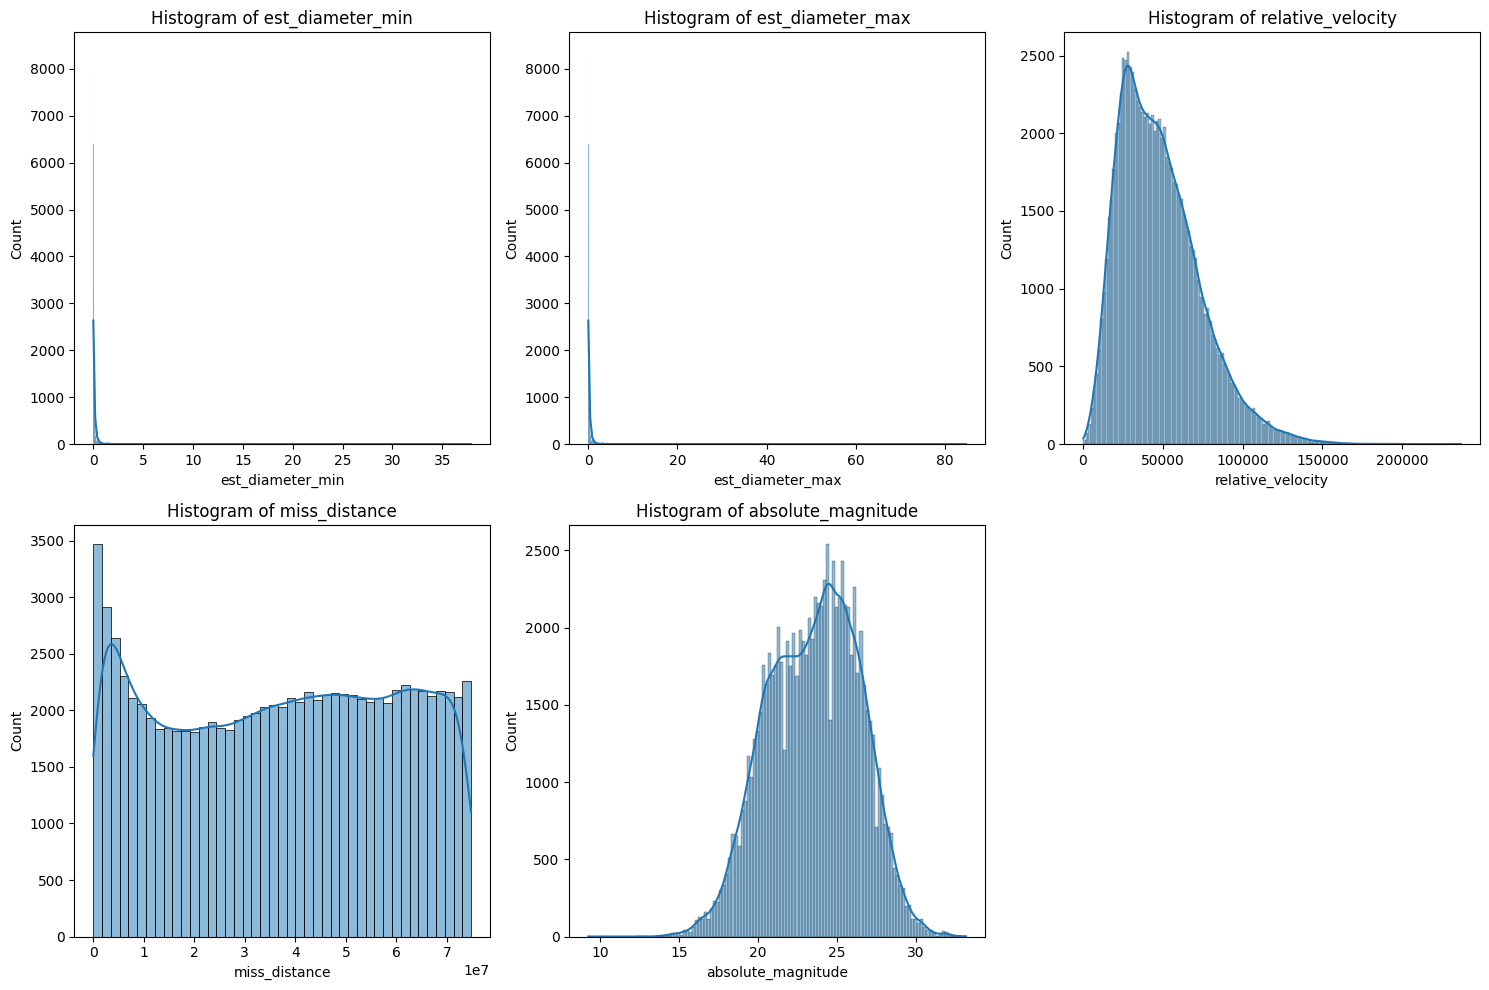

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Признак `miss_distance` не имеет выбросов, у признака `absolute_magnitude` количество выбросов находится в приемлемом диапазоне, а для признаков `est_diameter_min`, `est_diameter_max` и `relative_velocity` необходимо использовать метод решения проблемы выбросов. Воспользуемся методом усреднения значений:

In [13]:
columns_to_fix = ['est_diameter_min', 'est_diameter_max', 'relative_velocity']

for column in columns_to_fix:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Определяем границы для выбросов
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

Оценим выбросы в выборке после усреднения:

Количество выбросов в столбце 'est_diameter_min': 0
Количество выбросов в столбце 'est_diameter_max': 0
Количество выбросов в столбце 'relative_velocity': 0


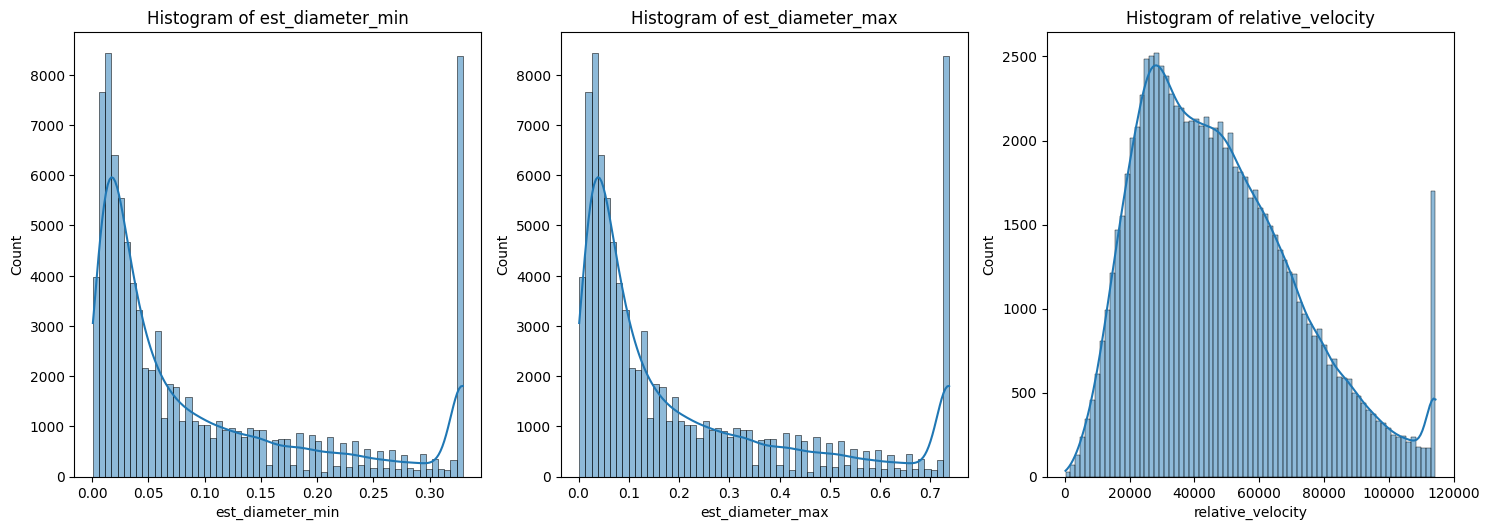

In [14]:
columns_to_check = ['est_diameter_min', 'est_diameter_max', 'relative_velocity']

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Судя по данным на диаграмме выше, нам удалось избавиться от выбросов в соответствующих признаках.

### Разбиение датасета на выборки

Обучающая выборка:  (63585, 7)
hazardous
False    57399
True      6186
Name: count, dtype: int64


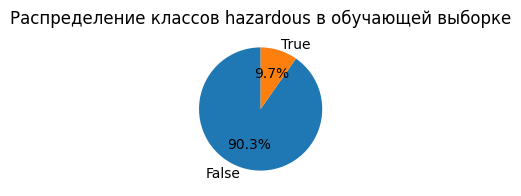

Контрольная выборка:  (13625, 7)
hazardous
False    12315
True      1310
Name: count, dtype: int64


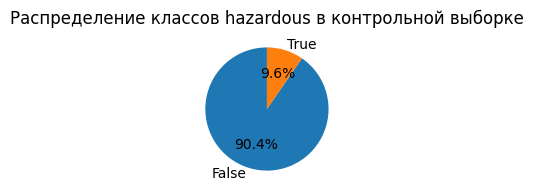

Тестовая выборка:  (13626, 7)
hazardous
False    12282
True      1344
Name: count, dtype: int64


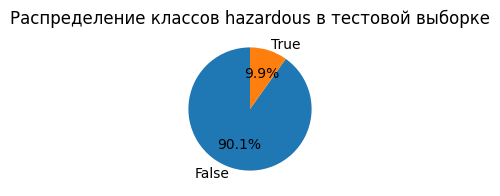

In [15]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Обучающая выборка: ", train_data.shape)
print(train_data.hazardous.value_counts())
hazardous_counts = train_data['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке')
plt.show()

print("Контрольная выборка: ", val_data.shape)
print(val_data.hazardous.value_counts())
hazardous_counts = val_data['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в контрольной выборке')
plt.show()

print("Тестовая выборка: ", test_data.shape)
print(test_data.hazardous.value_counts())
hazardous_counts = test_data['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тестовой выборке')
plt.show()

Как видно из круговых диаграмм, распределение классов сильно смещено, что может привести к проблемам в обучении модели, так как модель будет обучаться в основном на одном классе. В таком случае имеет смысл рассмотреть методы аугментации данных.

### Аугментация данных методом оверсемплинга

Этот метод увеличивает количество примеров меньшинства.

Обучающая выборка после оверсемплинга:  (115166, 7)
hazardous
True     57767
False    57399
Name: count, dtype: int64


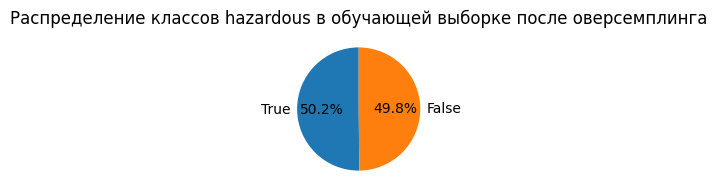

In [16]:
from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(train_data.drop(columns=['hazardous']), train_data['hazardous'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после оверсемплинга: ", df_train_adasyn.shape)
print(df_train_adasyn['hazardous'].value_counts())
hazardous_counts = df_train_adasyn['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке после оверсемплинга')
plt.show()

### Аугментация данных методом андерсемплинга

Проведём также приращение данных методом выборки с недостатком (андерсемплинг). Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после андерсемплинга:  (12372, 7)
hazardous
False    6186
True     6186
Name: count, dtype: int64


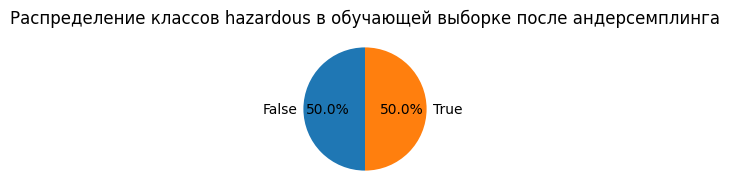

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(train_data.drop(columns=['hazardous']), train_data['hazardous'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после андерсемплинга: ", df_train_undersampled.shape)
print(df_train_undersampled['hazardous'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке после андерсемплинга')
plt.show()

## Датасет №3. Данные о диабете индейцев Пима

[**Ссылка**](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

**Проблемная область**: Данный набор данных связан с наблюдением о наличии диабета у женщин из группы коренного народа Пима, основываясь на медицинских показателях. Диабет является хроническим заболеванием, которое требует длительного лечения и оказывает значительное влияние на качество жизни пациентов.

**Объекты наблюдения**: Каждая строка (запись) в наборе данных соответствует одному пациенту из группы индейцев Пима.

**Атрибуты объектов:**
- `Pregnancies` - количество беременностей у пациента.
- `Glucose` - уровень глюкозы в крови.
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.).
- `SkinThickness` - толщина кожной складки на трицепсе (мм).
- `Insulin` - уровень инсулина в сыворотке крови (мЕд/мл).
- `BMI` - индекс массы тела (вес в кг/кв. м роста).
- `DiabetesPedigreeFunction` - коэффициент наследственной предрасположенности к диабету.
- `Age` - возраст пациента.
- `Outcome` - целевой признак, показывающий наличие (1) или отсутствие (0) диабета.

**Бизнес-цель**: Оптимизация страховых предложений. Страховые компании могут предложить индивидуализированные тарифы, исходя из вероятности возникновения у пациента диабета, что позволит снизить риски и сделать страхование доступнее.

**Техническая цель**: Разработка предсказательной модели для классификации пациентов по риску. На основании этого риска можно сформировать динамические предложения для клиентов.

**Входные данные**: Данные о пациентах.

**Целевая переменная**: Диагноз диабета (`Outcome`).

In [18]:
import pandas as pd
df = pd.read_csv(".//static//csv//diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Получение сведений о пропущенных данных

In [19]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool



Пропущенных данных в датасете **не обнаружено**

### Проверка набора данных на выбросы

Количество выбросов в столбце 'Pregnancies': 4
Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'BloodPressure': 45
Количество выбросов в столбце 'SkinThickness': 1
Количество выбросов в столбце 'Insulin': 34
Количество выбросов в столбце 'BMI': 19
Количество выбросов в столбце 'DiabetesPedigreeFunction': 29
Количество выбросов в столбце 'Age': 9


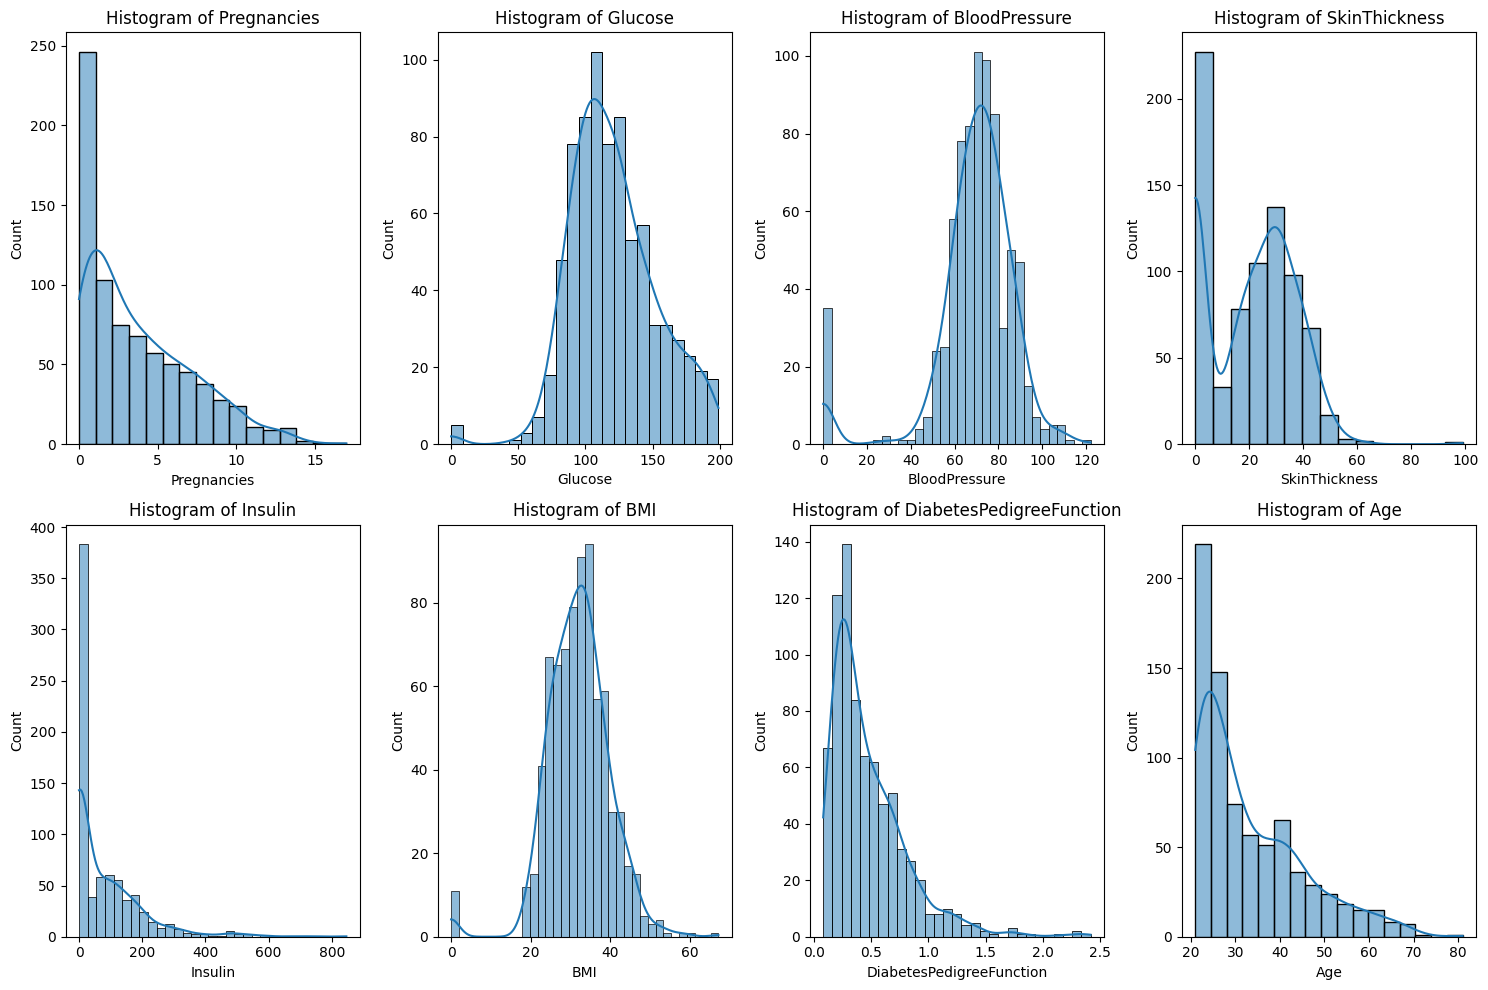

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Объемы выбросов по различным признакам оказались в приемлемых границах. Усреднение выбросов не требуется.

### Разбиение датасета на выборки

Обучающая выборка:  (537, 9)
Outcome
0    349
1    188
Name: count, dtype: int64


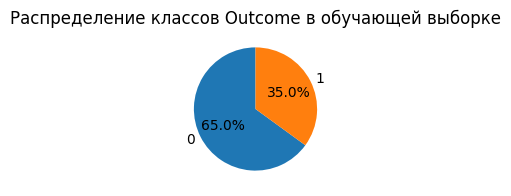

Контрольная выборка:  (115, 9)
Outcome
0    78
1    37
Name: count, dtype: int64


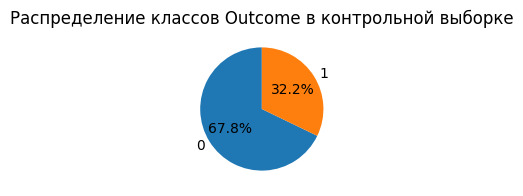

Тестовая выборка:  (116, 9)
Outcome
0    73
1    43
Name: count, dtype: int64


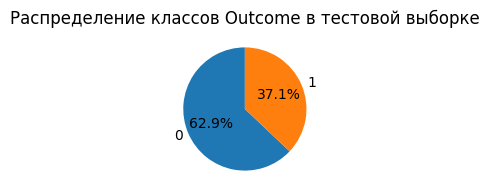

In [21]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Обучающая выборка: ", train_data.shape)
print(train_data.Outcome.value_counts())
outcome_counts = train_data['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в обучающей выборке')
plt.show()

print("Контрольная выборка: ", val_data.shape)
print(val_data.Outcome.value_counts())
outcome_counts = val_data['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в контрольной выборке')
plt.show()

print("Тестовая выборка: ", test_data.shape)
print(test_data.Outcome.value_counts())
outcome_counts = test_data['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тестовой выборке')
plt.show()

Как видно из круговых диаграмм, распределение классов достаточно смещено, что может привести к проблемам в обучении модели, так как модель будет обучаться в большей степени на одном классе. В таком случае имеет смысл рассмотреть методы аугментации данных.

### Аугментация данных методом оверсемплинга

Этот метод увеличивает количество примеров меньшинства.

Обучающая выборка после оверсемплинга:  (677, 9)
Outcome
0    349
1    328
Name: count, dtype: int64


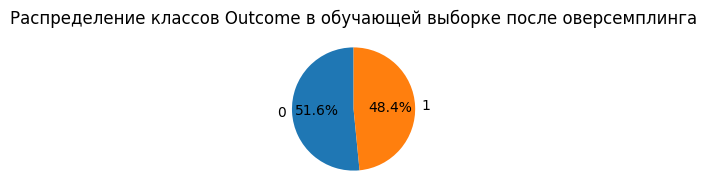

In [22]:
from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(train_data.drop(columns=['Outcome']), train_data['Outcome'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после оверсемплинга: ", df_train_adasyn.shape)
print(df_train_adasyn['Outcome'].value_counts())
counts = df_train_adasyn['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в обучающей выборке после оверсемплинга')
plt.show()

### Аугментация данных методом андерсемплинга

Проведём также приращение данных методом выборки с недостатком (андерсемплинг). Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после андерсемплинга:  (376, 9)
Outcome
0    188
1    188
Name: count, dtype: int64


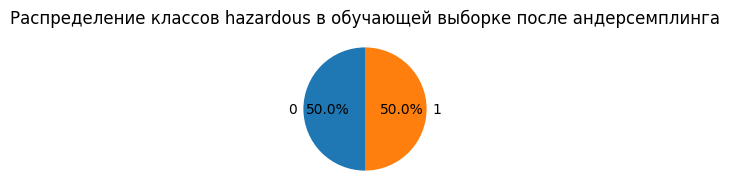

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(train_data.drop(columns=['Outcome']), train_data['Outcome'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после андерсемплинга: ", df_train_undersampled.shape)
print(df_train_undersampled['Outcome'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке после андерсемплинга')
plt.show()